In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices


1. gender – Пол клиента (например, "male" или "female").
2. Near_Location – Проживает ли клиент рядом с местом предоставления услуг (например, 1 - да, 0 - нет).
3. Partner – Является ли клиент сотрудником компании-партнера.
4. Promo_friends – Зарегистрировался ли клиент через акцию "приведи друга" (например, 1 - да, 0 - нет).
5. Phone – Есть ли у клиента указанный номер телефона (например, 1 - да, 0 - нет).
6. Contract_period – Срок действия контракта (в месяцах).
7. Group_visits – Посещает ли клиент групповые занятия (например, 1 - да, 0 - нет).
8. Age – Возраст клиента.
9. Avg_additional_charges_total – Средняя сумма дополнительных расходов клиента (например, покупки напитков, прокат оборудования).
10. Month_to_end_contract – Количество месяцев до окончания текущего контракта.
11. Lifetime – Длительность взаимодействия клиента с компанией (в месяцах).
12. Avg_class_frequency_total – Средняя частота посещений занятий клиентом за всё время.
13. Avg_class_frequency_current_month – Средняя частота посещений занятий клиентом за последний месяц.
14. Churn – Целевой столбец, указывающий, ушел ли клиент (например, 1 - ушел, 0 - остался).

In [75]:
file = r'C:\\Users\palux\Desktop\df s\gym_churn.csv'
df = pd.read_csv(file)

<Axes: >

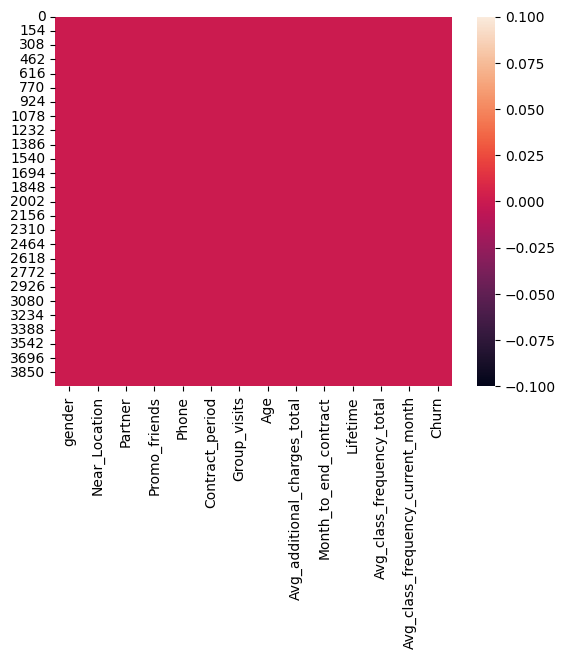

In [76]:
sns.heatmap(df.isna())

Пропусков необноружено. Можно использовать все данные, без заполнения.

<Axes: >

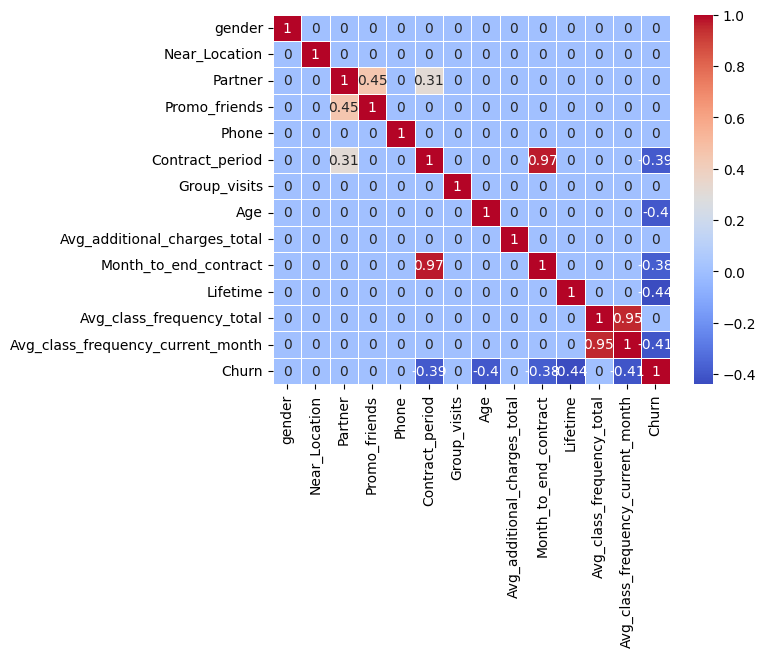

In [77]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

Из таблицы корреляции можно сделать выводы:
1. Свзяь между Promo_friens и Partner - прямая, средняя (0.45)
2. Связь между Contact_period и Partner - прямая, средняя (0.31)

Остальные признаки слабо влияют друг на друга ( < 0.3 )  

In [ ]:
res = smf.ols(formula='Lifetime ~ gender + Near_Location + Partner + Promo_friends + Phone', data = df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Lifetime   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     8.504
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           5.09e-08
Time:                        22:12:39   Log-Likelihood:                -10940.
No. Observations:                4000   AIC:                         2.189e+04
Df Residuals:                    3994   BIC:                         2.193e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.0752      0.251     12.233      0.000       2.582       3.568
gender            0.1025      0.118      0.868      0.385      -0.129       0.334
Near_Location     0.6464      0.168      3.846      0.000       0.317       0.976
Partner           0.3290      0.133      2.469      0.014       0.068       0.590
Promo_friends     0.3234      0.147      2.193      0.028       0.034       0.613
Phone            -0.2313      0.200     -1.157      0.247      -0.623       0.161
==============================================================================
Omnibus:                     1621.699   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7410.589
Skew:                           1.945   Prob(JB):                         0.00
Kurtosis:                       8.417   Cond. No.                         9.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
y,X = dmatrices('Lifetime ~ gender + Near_Location + Partner + Promo_friends + Phone',
                data = df,
                return_type='dataframe')

In [101]:
y.head(5)

,Lifetime
0,3.0
1,7.0
2,2.0
3,2.0
4,3.0


In [102]:
X.head(5)

,Intercept,gender,Near_Location,Partner,Promo_friends,Phone
0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0


In [103]:
# Describe Model
mod = sm.OLS(y, X)

# Fit Model
res = mod.fit()

# Summarize Model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Lifetime   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     8.504
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           5.09e-08
Time:                        22:15:10   Log-Likelihood:                -10940.
No. Observations:                4000   AIC:                         2.189e+04
Df Residuals:                    3994   BIC:                         2.193e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.0752      0.251     12.233      0.000       2.582       3.568
gender            0.1025      0.118      0.868      0.385      -0.129       0.334
Near_Location     0.6464      0.168      3.846      0.000       0.317       0.976
Partner           0.3290      0.133      2.469      0.014       0.068       0.590
Promo_friends     0.3234      0.147      2.193      0.028       0.034       0.613
Phone            -0.2313      0.200     -1.157      0.247      -0.623       0.161
==============================================================================
Omnibus:                     1621.699   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7410.589
Skew:                           1.945   Prob(JB):                         0.00
Kurtosis:                       8.417   Cond. No.                         9.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""